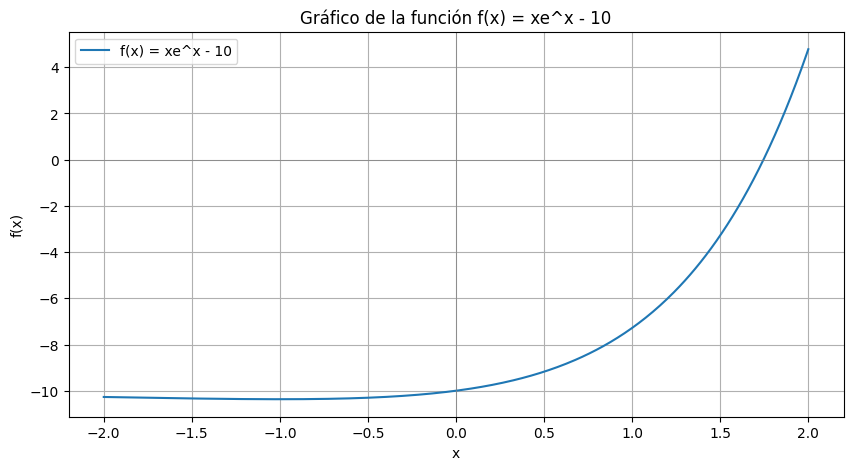

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función
def f(x):
    return x * np.exp(x) - 10

# Generación de valores x para el gráfico
x_values = np.linspace(-2, 2, 400)
y_values = f(x_values)

# Creación del gráfico
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='f(x) = xe^x - 10')
plt.axhline(0, color='gray', lw=0.5)  # Línea horizontal en y=0
plt.axvline(0, color='gray', lw=0.5)  # Línea vertical en x=0
plt.title('Gráfico de la función f(x) = xe^x - 10')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import math

def punto_fijo(g, p0, TOL, N0):
    """
    Método de punto fijo para encontrar una solución aproximada de p = g(p).

    Parámetros:
    g (callable): La función g(p) que define la iteración.
    p0 (float): Valor inicial para empezar las iteraciones.
    TOL (float): Tolerancia que determina la precisión deseada.
    N0 (int): Número máximo de iteraciones permitidas.

    Retorna:
    float o None: Retorna el punto fijo aproximado o None si el método falla.
    """
    i = 1  # Inicializa el contador de iteraciones
    while i <= N0:  # Bucle que permite un máximo de N0 iteraciones
        p = g(p0)  # Calcula el nuevo valor de p usando g
        if abs(p - p0) < TOL:  # Comprueba si la diferencia es menor que la tolerancia
            return p  # Retorna el valor de p si se cumple la condición de parada
        p0 = p  # Actualiza p0 para la siguiente iteración
        i += 1  # Incrementa el contador de iteraciones
    return None  # Retorna None si no se encontró un punto fijo después de N0 iteraciones

# Función g derivada de la ecuación original x * exp(x) = 10
def g(x):
    """
    Función g derivada de la ecuación original x * exp(x) = 10.
    Reorganizamos para que x = ln(10/x) si x != 0
    """
    if x == 0:
        return 0  # Evitar división por cero
    else:
        try:
            return math.log(10 / x)
        except ValueError:
            return None  # Retorna None si el logaritmo no está definido

# Parámetros iniciales
p0 = 1.5  # Valor inicial
TOL = 0.0001  # Tolerancia
N0 = 20  # Máximo número de iteraciones

# Ejecución del método
resultado_punto_fijo = punto_fijo(g, p0, TOL, N0)
if resultado_punto_fijo is not None:
    print(f"El punto fijo encontrado es: {resultado_punto_fijo}")
else:
    print("El método de punto fijo no convergió o g(x) produjo un valor inválido")

# Retorna el código ajustado para ser usado en la adaptación
(resultado_punto_fijo, punto_fijo.__code__, g.__code__)


El punto fijo encontrado es: 1.745493303019991


(1.745493303019991,
 <code object punto_fijo at 0x000002287EF68AE0, file "C:\Users\johan\AppData\Local\Temp\ipykernel_5212\2367834906.py", line 3>,
 <code object g at 0x000002280E7DC030, file "C:\Users\johan\AppData\Local\Temp\ipykernel_5212\2367834906.py", line 26>)

In [4]:
import math

def metodo_steffensen(g, p0, TOL, N0):
    """
    Método de Steffensen para encontrar una solución aproximada de la ecuación g(p) = p.

    Args:
    g (callable): La función g definida para la iteración de punto fijo.
    p0 (float): Aproximación inicial.
    TOL (float): Tolerancia para determinar la convergencia.
    N0 (int): Número máximo de iteraciones permitidas.

    Returns:
    float: La solución aproximada, p, o None si el método falla.
    """
    i = 1  # Contador de iteraciones inicializado en 1
    while i <= N0:
        p1 = g(p0)  # Calcula g en la aproximación inicial
        p2 = g(p1)  # Calcula g en el resultado anterior
        # Fórmula de Steffensen para acelerar la convergencia
        p = p0 - (p1 - p0)**2 / (p2 - 2*p1 + p0)
        if abs(p - p0) < TOL:  # Chequea si la diferencia es menor que la tolerancia
            return p  # Retorna la solución aproximada
        p0 = p  # Actualiza p0 para la siguiente iteración
        i += 1  # Incrementa el contador de iteraciones
    return None  # Retorna None si no se alcanza convergencia en N0 iteraciones

# Reutilizamos la función g(x) = ln(10/x)
def g_steffensen(x):
    if x == 0:
        return 0  # Evitar división por cero
    else:
        try:
            return math.log(10 / x)
        except ValueError:
            return None  # Retorna None si el logaritmo no está definido

# Parámetros iniciales para Steffensen
p0_steffensen = 1.5  # Aproximación inicial
TOL_steffensen = 1e-7  # Tolerancia para la convergencia
N0_steffensen = 20  # Número máximo de iteraciones

# Ejecución del método de Steffensen
resultado_steffensen = metodo_steffensen(g_steffensen, p0_steffensen, TOL_steffensen, N0_steffensen)
if resultado_steffensen is not None:
    print(f"La solución aproximada con Steffensen es: {resultado_steffensen}")
else:
    print("El método de Steffensen no convergió o la función g retornó un valor no válido.")


La solución aproximada con Steffensen es: 1.7455280027406994


In [5]:
# Método de Newton-Raphson
def metodo_newton(f, df, p0, TOL, N0):
    """
    Método de Newton para encontrar una raíz de la función f.

    Args:
    f (callable): La función para la cual se busca la raíz.
    df (callable): La derivada de la función f.
    p0 (float): Valor inicial.
    TOL (float): Tolerancia.
    N0 (int): Número máximo de iteraciones.

    Returns:
    float: La raíz aproximada o None si el método no converge.
    """
    i = 0  # Contador de iteraciones inicializado en 0
    while i < N0:
        # Calculamos f(p0) y su derivada df(p0)
        f_p0 = f(p0)
        df_p0 = df(p0)

        # Aseguramos que no haya división por cero al aplicar el método
        if df_p0 == 0:
            print("Derivada cero encontrada, no se puede continuar con Newton.")
            return None

        # Aplicamos la fórmula de Newton para calcular la siguiente aproximación
        p = p0 - f_p0 / df_p0

        # Verificamos si hemos alcanzado la tolerancia
        if abs(p - p0) < TOL:
            return p  # Si la diferencia es menor que la tolerancia, devolvemos el valor

        p0 = p  # Actualizamos p0 para la siguiente iteración
        i += 1  # Incrementamos el contador de iteraciones

    # Si se alcanzó el número máximo de iteraciones sin convergencia
    print(f"El método de Newton fracasó después de {N0} iteraciones.")
    return None

# Función f(x) = xe^x - 10 y su derivada df(x) = e^x(x + 1)
def f_newton(x):
    return x * math.exp(x) - 10

def df_newton(x):
    return math.exp(x) * (x + 1)

# Parámetros iniciales para Newton
p0_newton = 1.5  # Valor inicial
TOL_newton = 1e-7  # Tolerancia
N0_newton = 100  # Máximo número de iteraciones

# Ejecutar el método de Newton
raiz_newton = metodo_newton(f_newton, df_newton, p0_newton, TOL_newton, N0_newton)

raiz_newton


1.7455280027406994

In [7]:
# Método de Bisección
def biseccion(f, a, b, TOL, N0):
    """
    Implementa el método de bisección para encontrar una raíz de la función f en el intervalo [a, b].
    
    Parámetros:
    f (callable): Función para la cual queremos encontrar una raíz.
    a (float): Límite inferior del intervalo inicial.
    b (float): Límite superior del intervalo inicial.
    TOL (float): Tolerancia, el criterio de parada que determina la precisión deseada.
    N0 (int): Número máximo de iteraciones permitidas.
    
    Retorna:
    float o None: La raíz aproximada de la función o None si el método fracasa o no se cumple Bolzano.
    """
    i = 1
    FA = f(a)  # Calculamos f(a)

    # Verificar el teorema de Bolzano para asegurar que hay una raíz en el intervalo
    if FA * f(b) >= 0:
        print("El teorema de Bolzano no se cumple en el intervalo dado, es decir, f(a) y f(b) no tienen signos opuestos.")
        return None

    # Iteramos hasta el máximo de iteraciones permitidas
    while i <= N0:
        # Calcular el punto medio del intervalo
        p = a + (b - a) / 2
        FP = f(p)  # Evaluamos f(p)
        
        # Verificar si hemos encontrado la raíz o si hemos alcanzado la tolerancia deseada
        if FP == 0 or (b - a) / 2 < TOL:
            print(f"Usando el teorema de Biseccion, la raíz aproximada es: {p} después de {i} iteraciones.")
            return p

        # Incrementar el contador de iteraciones
        i += 1

        # Decidimos si continuar la búsqueda en el intervalo [a, p] o [p, b]
        if FA * FP > 0:
            a = p
            FA = FP  # Actualizamos el valor de f(a)
        else:
            b = p

    # Si se alcanza el número máximo de iteraciones sin encontrar una raíz
    print(f'El método fracasó después de {N0} iteraciones.')
    return None

# Función específica para la cual queremos encontrar una raíz (xe^x = 10 -> f(x) = xe^x - 10)
def funcion_biseccion(x):
    return x * math.exp(x) - 10

# Parámetros iniciales
a_biseccion = 1  # Límite inferior del intervalo
b_biseccion = 2  # Límite superior del intervalo
TOL_biseccion = 1e-4  # Tolerancia
N0_biseccion = 100  # Máximo número de iteraciones

# Ejecutar el método de bisección
raiz_biseccion = biseccion(funcion_biseccion, a_biseccion, b_biseccion, TOL_biseccion, N0_biseccion)

raiz_biseccion


Usando el teorema de Biseccion, la raíz aproximada es: 1.74554443359375 después de 14 iteraciones.


1.74554443359375